In [ ]:
# google colab で実行する場合は以下のコメントアウトを外して実行
# # ! wget https://raw.githubusercontent.com/KHiraGit/sudspg_ds/main/ds08_kumagaya_weather_2020.csv

# その他の環境で実行する場合は、データファイルとノートブックを同じフォルダにおいて実行

In [3]:
# 利用するライブラリをインポート
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [7]:
# 2020年熊谷の気象データのデータフレームに読み込む (ヘッダありファイル)
kumagaya_weather_df = pd.read_csv('ds08_kumagaya_weather_2020.csv')
x = np.sort(kumagaya_weather_df['ave_humidity'].values)
y = kumagaya_weather_df['rain'].values[np.argsort(kumagaya_weather_df['ave_humidity'].values)]
x_added_constant = sm.add_constant(x)  # 回帰計算のために定数項の列を追加

# モデルを推定して、結果を表示
logit_model = sm.Logit(y, x_added_constant)
logit_result = logit_model.fit(disp=0)
y_pred = logit_model.predict(logit_result.params)
print(logit_result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  366
Model:                          Logit   Df Residuals:                      364
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                  0.5087
Time:                        10:30:05   Log-Likelihood:                -112.67
converged:                       True   LL-Null:                       -229.34
Covariance Type:            nonrobust   LLR p-value:                 1.109e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.4431      1.638     -9.427      0.000     -18.654     -12.232
x1             0.1975      0.021      9.290      0.000       0.156       0.239


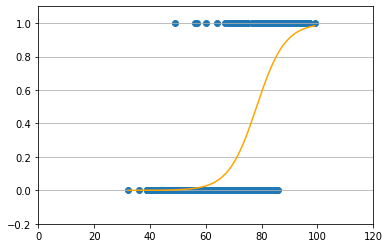

In [6]:
# 推定結果をグラフで表示
plt.scatter(x, y)
plt.plot(x.ravel(), y_pred, c='orange')
# plt.plot(_x, _y, c='red')
plt.xlim(0,120)
plt.ylim(-0.2, 1.1)
plt.grid(axis='y')
plt.show()